
Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


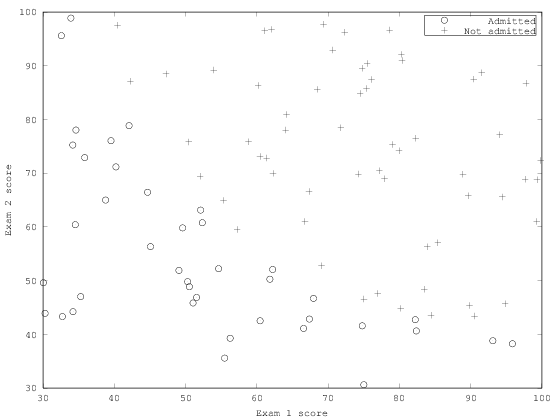

In [4]:
clear ; close all; clc
%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.

data = load('ex2data1.txt');
X = data(:, [1, 2]);
y = data(:, 3);

%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.
fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);
plotData(X, y);
% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;


In [5]:
%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in 
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 


Cost at theta found by fminunc: 0.203498
theta: 
 -25.161272 
 0.206233 
 0.201470 


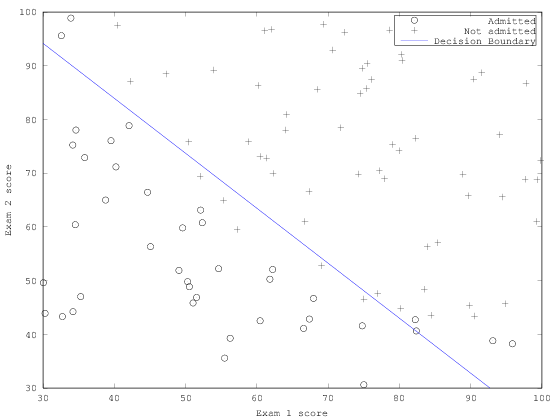

In [6]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf(' %f \n', theta);

% Plot Boundary
plotDecisionBoundary(theta, X, y);
% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

In [7]:
prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n\n'], prob);

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

For a student with scores 45 and 85, we predict an admission probability of 0.776289

Train Accuracy: 89.000000
